# Drill Present the same data multiple ways

Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/02/10

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import us
from collections import Counter
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

The data set used for this drill comes from kaggle; United States Energy, Census, and GDP 2010-2014.

https://www.kaggle.com/lislejoem/us_energy_census_gdp_10-14

The data set consists of three different types of data:

    1. Census and Geographic Data
    2. Energy Data
    3. Economic Data
    
Energy production and consumption are described in BTUs. The British thermal unit (Btu or BTU) is a traditional unit of heat; it is defined as the amount of heat required to raise the temperature of one pound of water by one degree Fahrenheit.

In [3]:
cs_df = pd.read_csv('/media/ianh/space/ThinkfulData/USEnergyCensusGDP/ECEDUS2010-2014.csv')
cs_df.shape
cs_df.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,East South Central,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaksa,4.0,Pacific,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,3.0,West South Central,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,4.0,Mountain,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,Pacific,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


## 1. Choose one variable and plot that variable four different ways

In [4]:
CoalC_df = cs_df[['StateCodes', 'CoalC2014']]
CoalC_df = CoalC_df[:-1]

In [5]:
CoalC_df = CoalC_df.sort_values('CoalC2014')

The column CoalC2014 is the total coal consumption in billion BTU in given year for each state in the union.
The last row of the resulting the data frame is dropped. This row contains the summation of coal consumption for all the states.

### Bar Graph

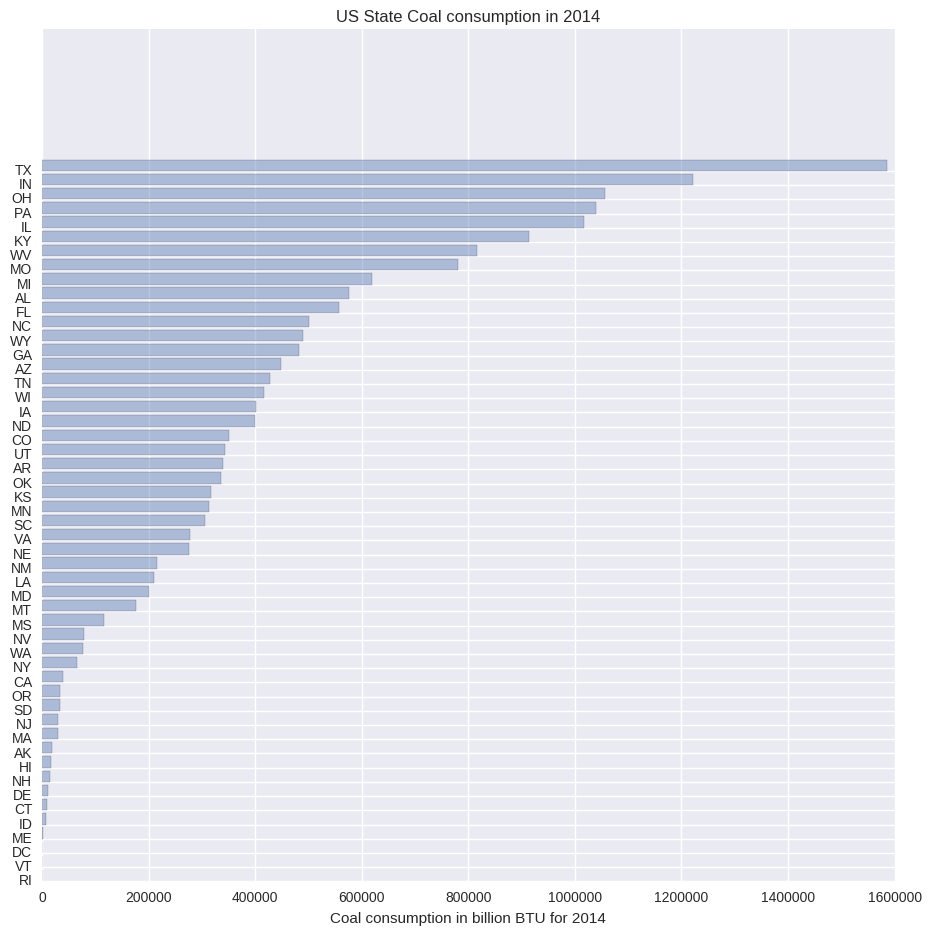

In [6]:
plt.figure(figsize=(11,11))
y_pos = np.arange(len(CoalC_df['StateCodes']))
plt.barh(y_pos, CoalC_df['CoalC2014'], alpha=0.4)
plt.yticks(y_pos, CoalC_df['StateCodes'])
plt.xlabel('Coal consumption in billion BTU for 2014')
plt.title('US State Coal consumption in 2014')
plt.show()

A bar graph is used to visualize differences in a variable between items. This case the coal consumption of US states in 2014.  By ordering the data is becomes very apparent fast which states consume the most coal and those that do not.  A disadvantage of the bra graph is that nothing else can be learned from the data. Perhaps the only plot that can be used for nominal data.  

### Histogram

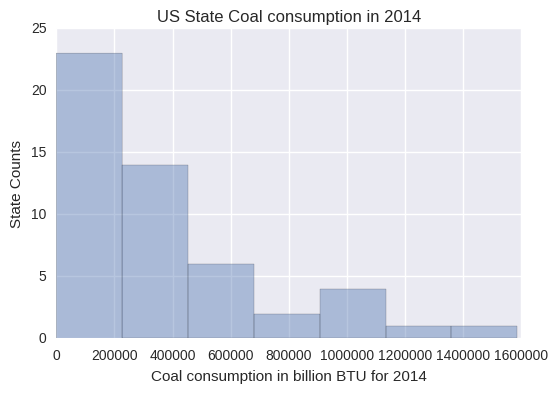

In [7]:
ax = sns.distplot(CoalC_df['CoalC2014'], kde=False)
ax.set(xlabel='Coal consumption in billion BTU for 2014', ylabel='State Counts')
sns.plt.title('US State Coal consumption in 2014')
plt.show()

A histogram reveals the distribution of a dataset and the count of items at each bin.  There are better ways to visualize outliers and the individual values at each index.   Very useful for exploratory data analysis.

### Boxplot

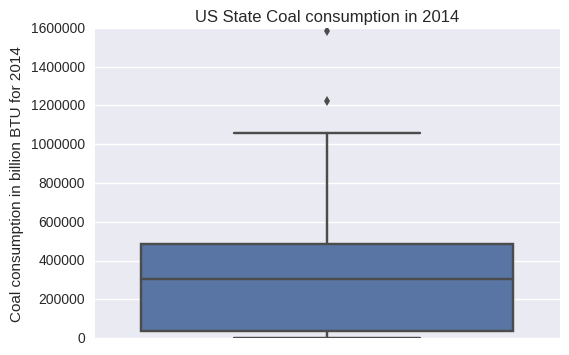

In [8]:
ax = sns.boxplot(y="CoalC2014", data=CoalC_df)
ax.set(ylabel='Coal consumption in billion BTU for 2014')
sns.plt.title('US State Coal consumption in 2014')
plt.show()

The box plot's only use is to display the distribution of data about the median, first and third quartile and any outliers. Great for depicting the range of data.

### Kernel density estimaton

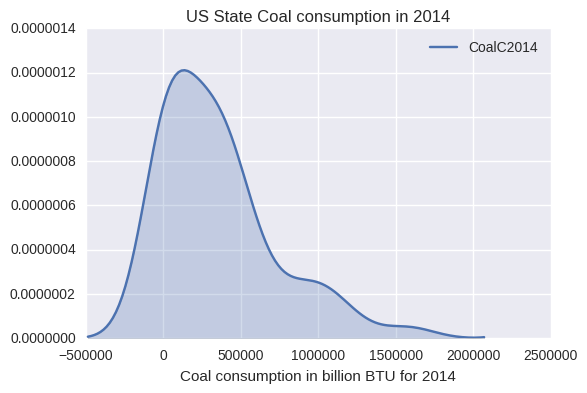

In [9]:
ax = sns.kdeplot(CoalC_df['CoalC2014'], shade=True)
ax.set(xlabel='Coal consumption in billion BTU for 2014')
sns.plt.title('US State Coal consumption in 2014')
plt.show()

The KDE plot is very useful for depicting the distribution of a dataset yet very poor at showing the values at a particular point in the curve. For some the right hand side of the x axis may be misleading if  the dataset only contains positive values.

## 2. Choose two continuous variables, and plot them three different ways

For this portion we will visualize the total energy production and consumption for each state.

TotalC2014: Total energy consumption in billion BTU in the year 2014.

TotalP2014: Total energy production in billion BTU in the year 2014.

In [10]:
CPEnergy_df = cs_df[['StateCodes', 'TotalC2014', 'TotalP2014']]
CPEnergy_df = CPEnergy_df[:-1]

### Scatter Plot

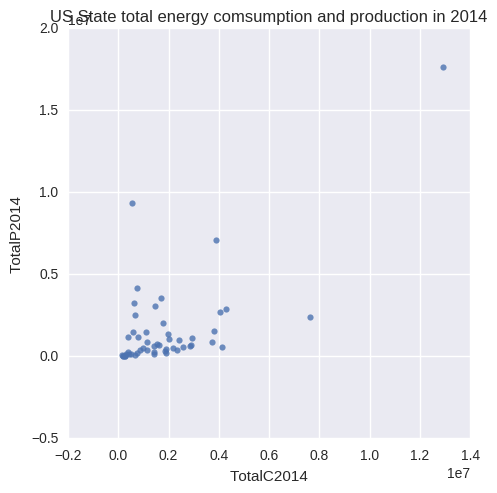

In [11]:
sns.lmplot(x="TotalC2014", y="TotalP2014", data=CPEnergy_df, fit_reg=False)
sns.plt.title('US State total energy comsumption and production in 2014')
plt.show()

The scatter plot is useful for looking for associations between two variables.  The obvious downside to the scatter plot is discerning multiple points when the datasets are clumped together tightly within a single region of the plot.   

### Hexbin plots

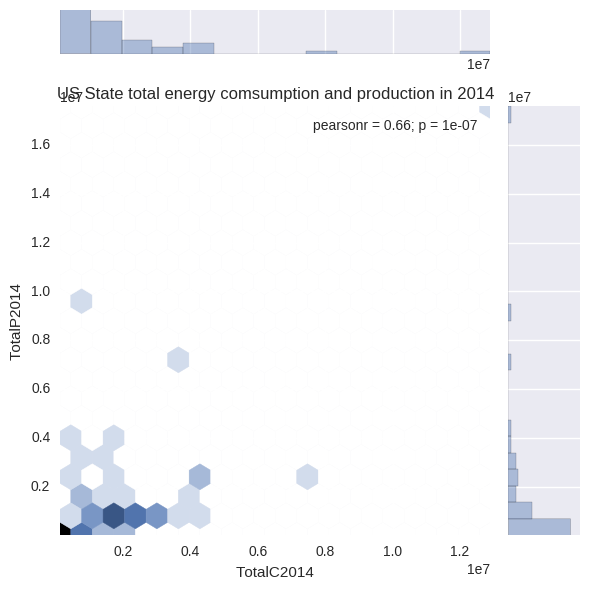

In [12]:
a = sns.jointplot(x="TotalC2014", y="TotalP2014", data=CPEnergy_df, kind="hex")
a.ax_joint.set_title('US State total energy comsumption and production in 2014')
plt.tight_layout()
plt.show()

A Hexbin plot shows the counts of observations within hexagonal bins via a darker shade of color.
This plot would appear to work best with relatively large datasets.
In addition, this plot is simpler to discern than two two histograms drawn on top of each other.

### Joint Kernel density estimation

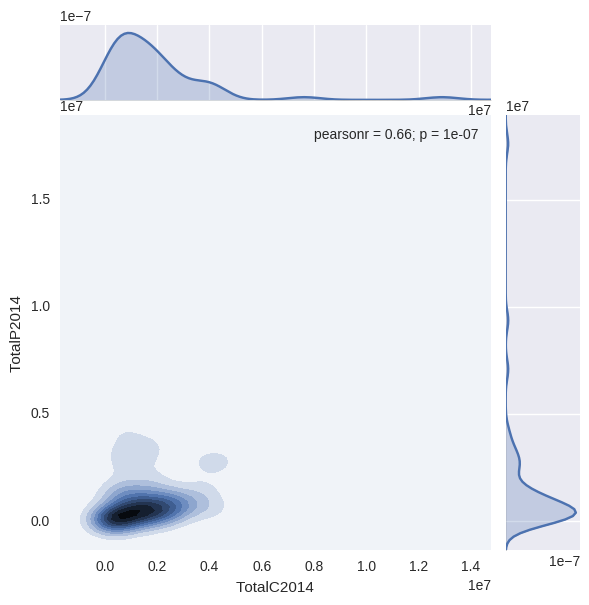

In [13]:
sns.jointplot(x="TotalC2014", y="TotalP2014", data=CPEnergy_df, kind="kde");

Displays two variables as a color map with the higher density of values shown in a dark color and those areas of the distribution with a lower density of values in lighter colors.  Great for depicting where the values for two datasets overlap. For this dataset a scatter plot contains too many values that have the same x and y coordinate making it difficult to differentiate individual points. Can be harder to see if a association exists between datasets unless the association is very strong  a perfect negative or positive association. 

## 3. Choose one continuous variable and one categorical variable, and plot them six different ways.

Coal consumption for all states for the years 2012 through 2014 will be used for visualization.  Again each value is total coal consumption in billion BTU for a the particular state. 

In [14]:
AllYearsCoalC_df = pd.read_csv('/media/ianh/space/ThinkfulData/USEnergyCensusGDP/ECEDUS2010-2014_part2.csv')

### Scatter Plot

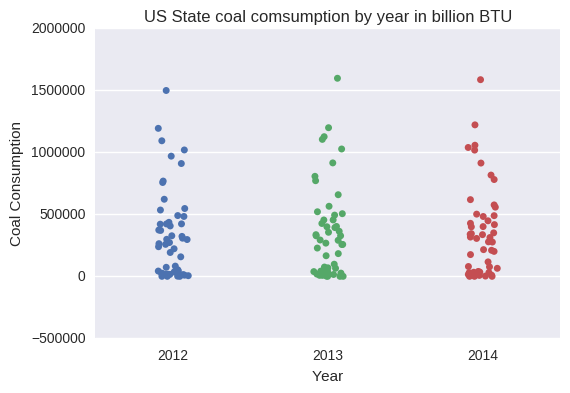

In [15]:
sns.stripplot(x="Year", y="Coal Consumption", data=AllYearsCoalC_df, jitter=True);
sns.plt.title('US State coal comsumption by year in billion BTU')
plt.show()

### Scatterplot with Swarm

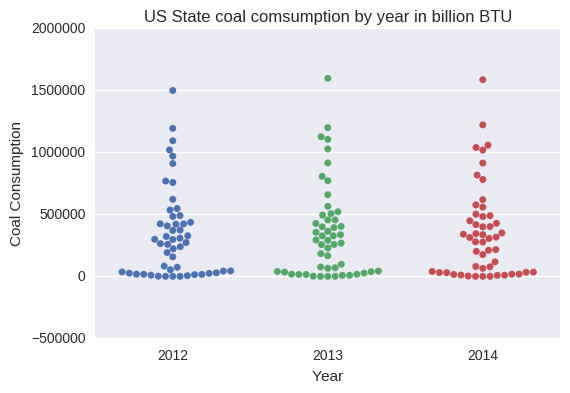

In [16]:
sns.swarmplot(x="Year", y="Coal Consumption", data=AllYearsCoalC_df);
sns.plt.title('US State coal comsumption by year in billion BTU')
plt.show()

### Boxplot

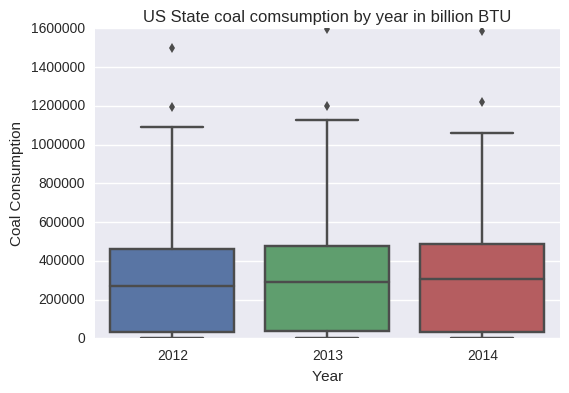

In [17]:
sns.boxplot(y="Coal Consumption", x="Year", data=AllYearsCoalC_df)
sns.plt.title('US State coal comsumption by year in billion BTU')
plt.show()

### Violinplots

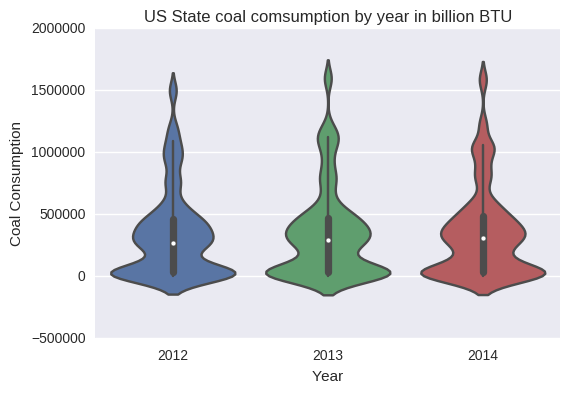

In [18]:
sns.violinplot(y="Coal Consumption", x="Year", data=AllYearsCoalC_df, scale="count", bw=.2)
sns.plt.title('US State coal comsumption by year in billion BTU')
plt.show()

### Combination of Violinplot and Swarmplot

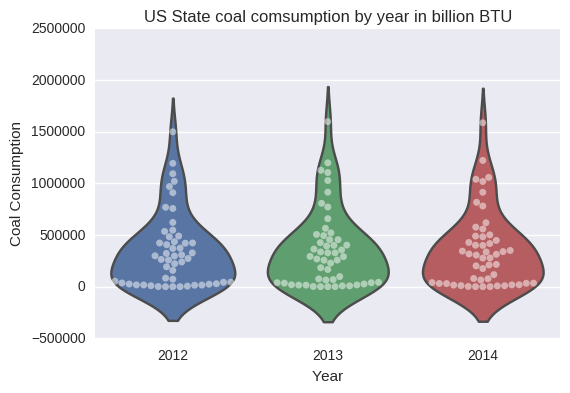

In [19]:
sns.violinplot(x="Year", y="Coal Consumption", data=AllYearsCoalC_df, inner=None)
sns.swarmplot(x="Year", y="Coal Consumption", data=AllYearsCoalC_df, color="w", alpha=.5);
sns.plt.title('US State coal comsumption by year in billion BTU')
plt.show()

### Point Plot

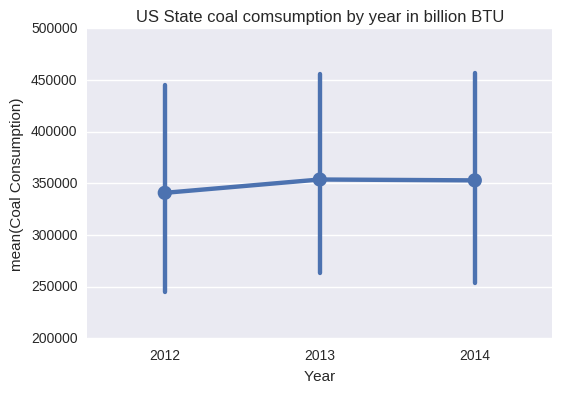

In [20]:
sns.pointplot(x="Year", y="Coal Consumption", data=AllYearsCoalC_df)
sns.plt.title('US State coal comsumption by year in billion BTU')
plt.show()

## Challenge

As an optional challenge, find a dataset with at least four continuous variables and one categorical variable.

For the challenge the same CSV file is used but the data frame will contain the geographical division that the coal producing state belongs to and the coal consumption in billion BTUs for the years 2010 through 2012.

In [21]:
CoalCRegions_df = cs_df[['Division', 'CoalC2010', 'CoalC2011', 'CoalC2012']]
CoalCRegions_df = CoalCRegions_df[:-1]

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


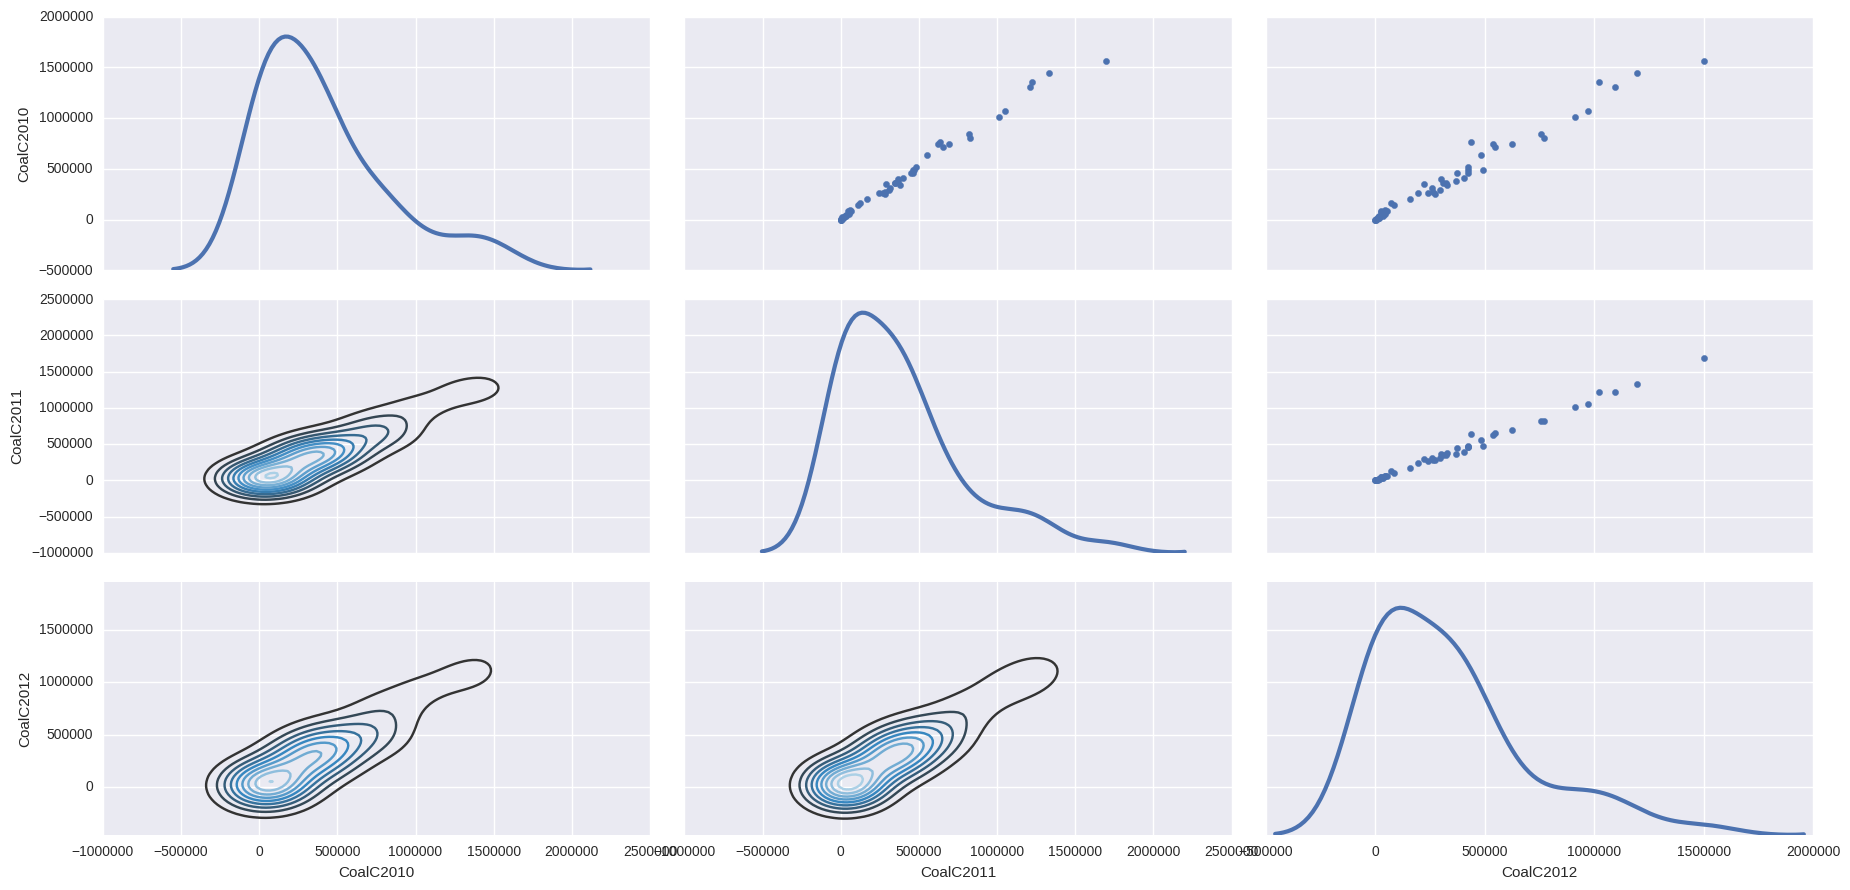

In [35]:
g = sns.PairGrid(CoalCRegions_df, diag_sharey=False, size=3, aspect=2)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

The distributions of the continuous data points are roughly the same for each year. All three scatter plots show a positive association. Each point is a state’s amount of coal consumption. For each year the amount changed slightly for each year and therefore each point on the scatter plot is  each state’s coal consumption for two different years. The KDE’s show that for each pair of years most states consumption lie below 500,000 billion BTUs. 